<a href="https://colab.research.google.com/github/m-ritam/OIBSIP/blob/main/Car_price_prediction_with_Python_Ritam_Maji.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [ ]:
carprice_data=pd.read_csv("/content/drive/MyDrive/Oasis Info/car price/CarPrice.csv")

In [ ]:
carprice_data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [ ]:
carprice_data.info

<bound method DataFrame.info of      car_ID  symboling                   CarName fueltype aspiration  \
0         1          3        alfa-romero giulia      gas        std   
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
203     204         -1                 volvo 246   diesel      turbo   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0          two  convertible   

In [ ]:
carprice_data.describe

<bound method NDFrame.describe of      car_ID  symboling                   CarName fueltype aspiration  \
0         1          3        alfa-romero giulia      gas        std   
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
203     204         -1                 volvo 246   diesel      turbo   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0          two  convertible 

<ipython-input-6-a4accff72afe>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(carprice_data.price)


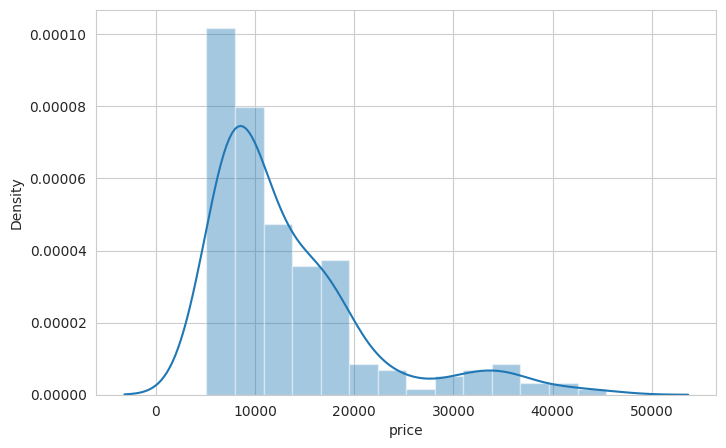

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))
sns.distplot(carprice_data.price)
plt.show()                                  #distribution of the values of the price column

In [ ]:
print(carprice_data.corr())                 # correlation among all the features of this dataset:


                    car_ID  symboling  wheelbase  carlength  carwidth  \
car_ID            1.000000  -0.151621   0.129729   0.170636  0.052387   
symboling        -0.151621   1.000000  -0.531954  -0.357612 -0.232919   
wheelbase         0.129729  -0.531954   1.000000   0.874587  0.795144   
carlength         0.170636  -0.357612   0.874587   1.000000  0.841118   
carwidth          0.052387  -0.232919   0.795144   0.841118  1.000000   
carheight         0.255960  -0.541038   0.589435   0.491029  0.279210   
curbweight        0.071962  -0.227691   0.776386   0.877728  0.867032   
enginesize       -0.033930  -0.105790   0.569329   0.683360  0.735433   
boreratio         0.260064  -0.130051   0.488750   0.606454  0.559150   
stroke           -0.160824  -0.008735   0.160959   0.129533  0.182942   
compressionratio  0.150276  -0.178515   0.249786   0.158414  0.181129   
horsepower       -0.015006   0.070873   0.353294   0.552623  0.640732   
peakrpm          -0.203789   0.273606  -0.360469  -

<ipython-input-7-8b2ecabab6fd>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(carprice_data.corr())                 # correlation among all the features of this dataset:


<ipython-input-8-aa776e95ce49>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = carprice_data.corr()


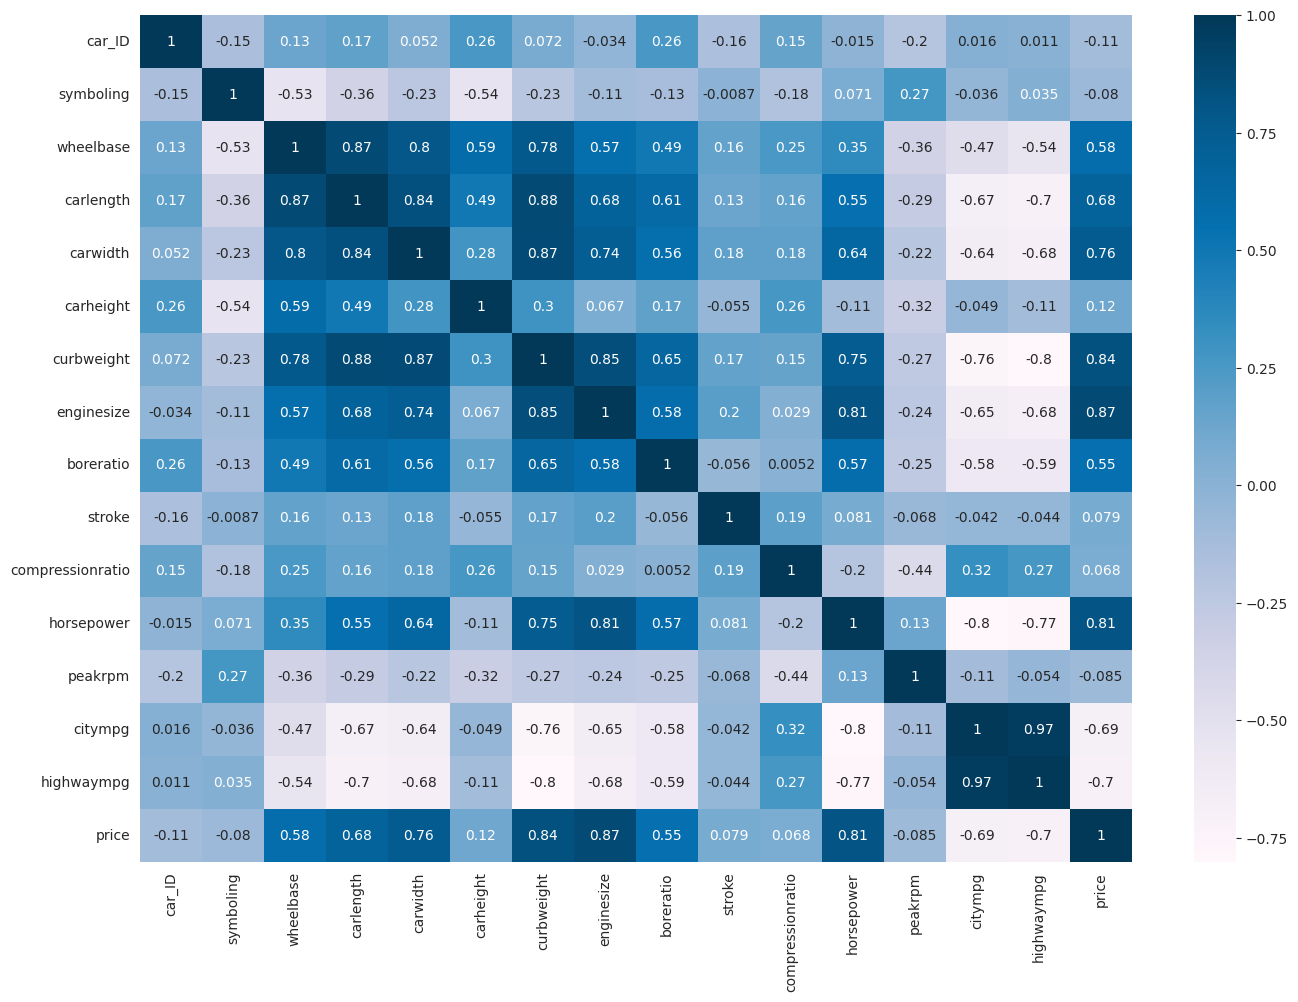

In [ ]:
plt.figure(figsize=(16,11))
correlations = carprice_data.corr()
sns.heatmap(correlations, cmap="PuBu", annot=True)
plt.show()

In [ ]:
predict = "price"
carprice_data = carprice_data[["symboling", "wheelbase", "carlength",
             "carwidth", "carheight", "curbweight",
             "enginesize", "boreratio", "stroke",
             "compressionratio", "horsepower", "peakrpm",
             "citympg", "highwaympg", "price"]]
x = np.array(carprice_data.drop([predict], 1))
y = np.array(carprice_data[predict])

<ipython-input-9-ba202151fef6>:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = np.array(carprice_data.drop([predict], 1))


In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
k = model.fit(xtrain, ytrain)
predictions = model.predict(xtest)
predictions

array([ 7738.   , 19045.   , 15250.   , 11549.   , 14869.   , 11595.   ,
       17859.167, 16503.   ,  7957.   , 16500.   , 16558.   ,  9720.   ,
        6849.   ,  7995.   , 28248.   ,  9720.   ,  6229.   ,  7995.   ,
        8195.   ,  9298.   , 45400.   , 33278.   ,  9549.   , 28248.   ,
       15250.   , 45400.   ,  9720.   ,  8013.   , 12170.   ,  9720.   ,
       41315.   ,  7126.   ,  8449.   , 12170.   ,  7349.   , 13860.   ,
       13499.   ,  5348.   ,  8948.   ,  7150.5  ,  6989.   ])

In [ ]:
from sklearn.metrics import mean_absolute_error
model.score(xtest, predictions)

1.0